In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [116]:
# load data
hmmtc = pd.read_csv('test_new.csv')
hmmtc.columns = hmmtc.columns.str.strip()
hmmtc.replace([np.inf, -np.inf], np.nan, inplace=True)
hmmtc.dropna(inplace=True)
hmmtc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3354 entries, 0 to 3353
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FundingSource   3354 non-null   object 
 1   LTV             3354 non-null   float64
 2   State           3354 non-null   object 
 3   LoanProcessor   3354 non-null   object 
 4   LoanOfficer     3354 non-null   object 
 5   LoanAmount      3354 non-null   float64
 6   AppraisedValue  3354 non-null   float64
 7   Closed          3354 non-null   int64  
 8   TimeWindow      3354 non-null   float64
 9   LoanNo.         3354 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 288.2+ KB


In [117]:
# set index
hmmtc = hmmtc.set_index('LoanNo.')
hmmtc.head()

,FundingSource,LTV,State,LoanProcessor,LoanOfficer,LoanAmount,AppraisedValue,Closed,TimeWindow
LoanNo.,,,,,,,,,
59871,First Bank,90.0,CO,JessicaPurtee,SusanAubin,291105.0,365000.0,1,30.000000
59919,MMRC,90.0,CA,CJ,TravisMullen,634500.0,980000.0,1,10.299909
59936,MMRC,74.0,AZ,Hayley,ChrisAepli,213300.0,287500.0,1,10.299909
59942,TBD_FS,90.0,AZ,Hayley,HerbBourdeaux,351990.0,301250.0,1,0.000000
59915,A Bonds,75.0,AZ,JessicaPurtee,MarkSteinbeck,223650.0,315000.0,1,16.000000


In [118]:
# change data type
hmmtc.loc[:, hmmtc.dtypes == 'object'] =hmmtc.select_dtypes(['object']).apply(lambda x: x.astype('category'))
print (hmmtc.dtypes) 

FundingSource     category
LTV                float64
State             category
LoanProcessor     category
LoanOfficer       category
LoanAmount         float64
AppraisedValue     float64
Closed               int64
TimeWindow         float64
dtype: object


In [119]:
hmmtc = pd.get_dummies(data=hmmtc, columns=['FundingSource', 'State','LoanProcessor','LoanOfficer'])
hmmtc.head()

,LTV,LoanAmount,AppraisedValue,Closed,TimeWindow,FundingSource_A Bonds,FundingSource_A&S,FundingSource_BOK,FundingSource_Bonds,FundingSource_C&G,...,LoanOfficer_KimHubbard,LoanOfficer_Lindsay,LoanOfficer_MarkSteinbeck,LoanOfficer_Max,LoanOfficer_Michael,LoanOfficer_Mike,LoanOfficer_SusanAubin,LoanOfficer_TBD_LO,LoanOfficer_TracyMcDonald,LoanOfficer_TravisMullen
LoanNo.,,,,,,,,,,,,,,,,,,,,,
59871,90.0,291105.0,365000.0,1,30.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
59919,90.0,634500.0,980000.0,1,10.299909,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59936,74.0,213300.0,287500.0,1,10.299909,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59942,90.0,351990.0,301250.0,1,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59915,75.0,223650.0,315000.0,1,16.000000,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [120]:
# counts
count1, count0 = hmmtc.Closed.value_counts()
closed = hmmtc[hmmtc.Closed==1]
withdrawn = hmmtc[hmmtc.Closed==0]
count1
closed.head()

,LTV,LoanAmount,AppraisedValue,Closed,TimeWindow,FundingSource_A Bonds,FundingSource_A&S,FundingSource_BOK,FundingSource_Bonds,FundingSource_C&G,...,LoanOfficer_KimHubbard,LoanOfficer_Lindsay,LoanOfficer_MarkSteinbeck,LoanOfficer_Max,LoanOfficer_Michael,LoanOfficer_Mike,LoanOfficer_SusanAubin,LoanOfficer_TBD_LO,LoanOfficer_TracyMcDonald,LoanOfficer_TravisMullen
LoanNo.,,,,,,,,,,,,,,,,,,,,,
59871,90.0,291105.0,365000.0,1,30.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
59919,90.0,634500.0,980000.0,1,10.299909,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59936,74.0,213300.0,287500.0,1,10.299909,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59942,90.0,351990.0,301250.0,1,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59915,75.0,223650.0,315000.0,1,16.000000,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [121]:
# over sampling(50/50)
# Generate sample of withdrawn types matching number of closed types
overwithdrawn = withdrawn.sample(count1,replace=True)
hmmtc2 = pd.concat([closed,overwithdrawn],axis=0)
print(len(overwithdrawn))
hmmtc2.head()

2989


,LTV,LoanAmount,AppraisedValue,Closed,TimeWindow,FundingSource_A Bonds,FundingSource_A&S,FundingSource_BOK,FundingSource_Bonds,FundingSource_C&G,...,LoanOfficer_KimHubbard,LoanOfficer_Lindsay,LoanOfficer_MarkSteinbeck,LoanOfficer_Max,LoanOfficer_Michael,LoanOfficer_Mike,LoanOfficer_SusanAubin,LoanOfficer_TBD_LO,LoanOfficer_TracyMcDonald,LoanOfficer_TravisMullen
LoanNo.,,,,,,,,,,,,,,,,,,,,,
59871,90.0,291105.0,365000.0,1,30.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
59919,90.0,634500.0,980000.0,1,10.299909,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59936,74.0,213300.0,287500.0,1,10.299909,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59942,90.0,351990.0,301250.0,1,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59915,75.0,223650.0,315000.0,1,16.000000,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [122]:
y=hmmtc2.Closed
X = hmmtc2.drop(labels='Closed', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=25)
X.head()

,LTV,LoanAmount,AppraisedValue,TimeWindow,FundingSource_A Bonds,FundingSource_A&S,FundingSource_BOK,FundingSource_Bonds,FundingSource_C&G,FundingSource_CBB,...,LoanOfficer_KimHubbard,LoanOfficer_Lindsay,LoanOfficer_MarkSteinbeck,LoanOfficer_Max,LoanOfficer_Michael,LoanOfficer_Mike,LoanOfficer_SusanAubin,LoanOfficer_TBD_LO,LoanOfficer_TracyMcDonald,LoanOfficer_TravisMullen
LoanNo.,,,,,,,,,,,,,,,,,,,,,
59871,90.0,291105.0,365000.0,30.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
59919,90.0,634500.0,980000.0,10.299909,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59936,74.0,213300.0,287500.0,10.299909,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59942,90.0,351990.0,301250.0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59915,75.0,223650.0,315000.0,16.000000,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Model1. Random Forest

In [123]:
# grid search
nmc = 50
param_grid={'max_features':[9,10,11,12],'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15],'n_estimators':[50]}
cvf=ShuffleSplit(test_size=0.25,n_splits=nmc)
grid_search=GridSearchCV(RandomForestClassifier(),param_grid,cv=cvf,return_train_score=True)
grid_search.fit(X,y)
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])

    rank_test_score  mean_test_score param_max_features param_max_depth
0                45         0.705686                  9               4
1                47         0.703826                 10               4
2                46         0.704281                 11               4
3                48         0.703679                 12               4
4                42         0.730355                  9               5
5                44         0.728896                 10               5
6                43         0.728963                 11               5
7                41         0.732241                 12               5
8                40         0.751853                  9               6
9                39         0.755692                 10               6
10               38         0.757940                 11               6
11               37         0.759599                 12               6
12               35         0.781686                  9         

In [44]:
from sklearn.metrics import mean_absolute_error
model = RandomForestClassifier(max_depth=14, max_features=12,n_estimators=500)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test, y_test))
print("Model Mean Absolute Error MAE {}".format(mean_absolute_error(y_test, preds)))

0.9836020011117287
0.94
Model Mean Absolute Error MAE 0.06


In [10]:
print(model.classes_)
print(model.predict_proba(X_test))
print(model.predict(X_test))

array([[0.33142776, 0.66857224],
       [0.64071771, 0.35928229],
       [0.31124338, 0.68875662],
       ...,
       [0.43846031, 0.56153969],
       [0.63663983, 0.36336017],
       [0.61242468, 0.38757532]])

Has Appraised Value              0.227038
Time Window                      0.166097
Appraised Value                  0.117345
Loan Amount                      0.085915
Funding Source_TBD_FS            0.063055
                                   ...   
Funding Source_Feiner            0.000000
Loan Processor_Charmaine         0.000000
Loan Processor_Hayley/Sabrina    0.000000
Funding Source_LHL               0.000000
Funding Source_Wdw Rck           0.000000
Length: 126, dtype: float64


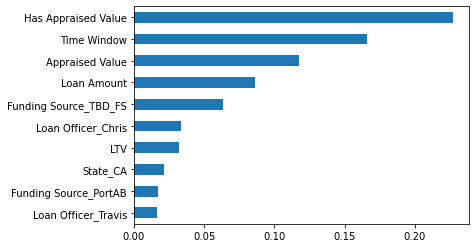

In [11]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_importances)
feat_importances.nlargest(10).plot(kind='barh').invert_yaxis()

In [12]:
pd.DataFrame(data=[model.feature_importances_],columns=X.columns)

,LTV,Loan Amount,Appraised Value,Has Appraised Value,Time Window,Funding Source_A Bonds,Funding Source_A&S,Funding Source_BOK,Funding Source_Bonds,Funding Source_C&G,...,Loan Officer_Susan,Loan Officer_Susan,Loan Officer_Susan/Justin,Loan Officer_Susan/Kim,Loan Officer_Susan/Max,Loan Officer_Susan/Tracy,Loan Officer_TBD_LO,Loan Officer_Tracy/Kim,Loan Officer_Travis,Loan Officer_Travis/Chris
0,0.03232,0.085915,0.117345,0.227038,0.166097,0.002985,0.003218,0.000002,0.000057,0.000062,...,0.01226,0.000008,0.003581,0.000632,0.000799,0.000042,0.000524,0.000666,0.016722,0.000503


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       609
           1       0.75      0.77      0.76       591

    accuracy                           0.77      1200
   macro avg       0.77      0.77      0.76      1200
weighted avg       0.77      0.77      0.77      1200



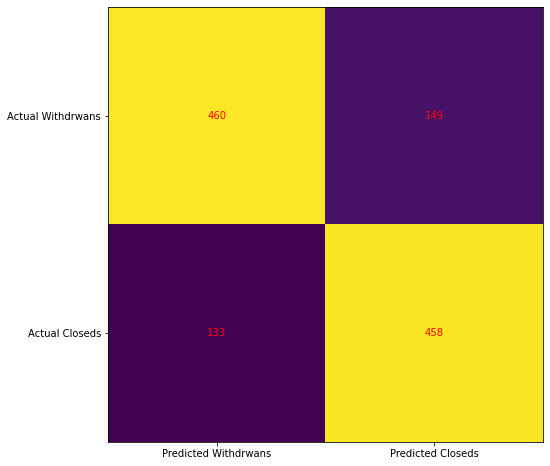

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Withdrwans', 'Predicted Closeds'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Withdrwans', 'Actual Closeds'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Model 2. Logistic Regression¶

In [ ]:
#grid search
nmc = 50
Clist = [10**c for c in np.arange(-5,10, dtype=float)]
fullmodel = make_pipeline(StandardScaler(),LogisticRegression(solver = 'liblinear', penalty='l1'))
param_grid={'logisticregression__C':Clist,'logisticregression__max_iter':[3000]}
cvf=ShuffleSplit(test_size=0.25,n_splits=nmc)
grid_search1=GridSearchCV(fullmodel,param_grid,cv=cvf,return_train_score=True)
grid_search1.fit(X,y)
results1 = pd.DataFrame(grid_search1.cv_results_)
print(results1[['rank_test_score','mean_test_score','param_logisticregression__C']])

In [71]:
model2 = LogisticRegression(solver='liblinear',penalty='l1', C=0.1, max_iter = 3000)
model2.fit(X_train, y_train)

preds2 = model2.predict(X_test)
print(model2.score(X_train,y_train))
print(model2.score(X_test, y_test))
print("Model Mean Absolute Error MAE {}".format(mean_absolute_error(y_test, preds2)))

0.618112870845416
0.5846153846153846
Model Mean Absolute Error MAE 0.4153846153846154


Has Appraised Value         1.593465
Funding Source_TBD_FS       0.748859
Loan Officer_Chris          0.537661
Loan Processor_Sabrina      0.405771
State_TX                    0.404989
                              ...   
Loan Officer_Bob            0.000000
Loan Officer_Bob            0.000000
Loan Officer_Bob/Adam       0.000000
Loan Officer_Bob/Brandon    0.000000
Loan Processor_Jessica      0.000000
Length: 126, dtype: float64


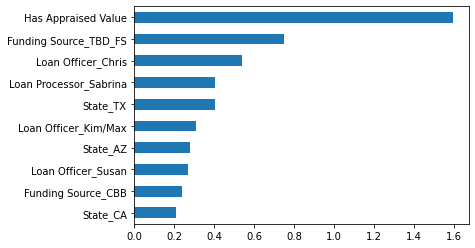

In [16]:
logis_importance = pd.Series(abs(model2.coef_[0]), index=X.columns).sort_values(ascending=False)
print(logis_importance)
logis_importance.nlargest(10).plot(kind='barh').invert_yaxis()

In [17]:
importance = model2.coef_[0]
top_ten = np.argpartition(importance, -10)[-10:]
print(X.columns[top_ten])
for i,v in enumerate(top_ten):
    print('Feature: %0d, Score: %.5f' % (i,v))

Index(['State_NM', 'Time Window', 'Loan Processor_CJ', 'Funding Source_PortAB',
       'Loan Officer_Susan', 'State_AZ', 'Funding Source_CBB',
       'Loan Processor_Sabrina', 'Has Appraised Value', 'Loan Officer_Chris'],
      dtype='object')
Feature: 0, Score: 44.00000
Feature: 1, Score: 4.00000
Feature: 2, Score: 52.00000
Feature: 3, Score: 26.00000
Feature: 4, Score: 116.00000
Feature: 5, Score: 36.00000
Feature: 6, Score: 10.00000
Feature: 7, Score: 65.00000
Feature: 8, Score: 3.00000
Feature: 9, Score: 94.00000


In [18]:
coef = pd.DataFrame(data= model2.coef_,columns=X.columns).T
coef = coef.rename(columns={0:'coefficient'})
print(coef[coef['coefficient']!=0])
print(model2.intercept_)

                         coefficient
LTV                    -3.872727e-03
Loan Amount            -3.013261e-07
Appraised Value        -7.394371e-07
Has Appraised Value     1.593465e+00
Time Window             1.530032e-03
Funding Source_A&S     -6.790056e-03
Funding Source_CBB      2.414927e-01
Funding Source_MMRC    -1.918812e-01
Funding Source_PortAB   1.151033e-01
Funding Source_TBD_FS  -7.488586e-01
State_AZ                2.787781e-01
State_CA               -2.098633e-01
State_TX               -4.049892e-01
Loan Processor_CJ       1.379044e-02
Loan Processor_Jessica -3.191436e-02
Loan Processor_Sabrina  4.057705e-01
Loan Officer_Chris      5.376610e-01
Loan Officer_Kim/Max   -3.092968e-01
Loan Officer_Susan      2.687246e-01
Loan Officer_Travis    -1.363395e-01
[-0.00572806]


In [19]:
print(model2.classes_)
print(model2.predict_proba(X_test))
print(model2.predict(X_test))
#The first column corresponds to the probability that the sample belongs to the first class and 
#the second column corresponds to the probability that the sample belongs to the second class.

[0 1]
[[0.14888877 0.85111123]
 [0.74096348 0.25903652]
 [0.23630873 0.76369127]
 ...
 [0.5210272  0.4789728 ]
 [0.79989091 0.20010909]
 [0.68477595 0.31522405]]
[1 0 1 ... 0 0 0]


# Model 3. GradientBoostingClassifier

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(n_estimators=200,max_depth=5,learning_rate=0.2)
gbt.fit(X_train,y_train)
print(gbt.score(X_train,y_train))
print(gbt.score(X_test,y_test))

0.9977693508811064
0.9678929765886287


In [26]:
gbt.predict_proba(X_test)

array([[3.84685254e-04, 9.99615315e-01],
       [9.80277742e-01, 1.97222582e-02],
       [8.75445079e-04, 9.99124555e-01],
       ...,
       [9.97436862e-01, 2.56313832e-03],
       [9.92939914e-01, 7.06008566e-03],
       [9.91214140e-01, 8.78586025e-03]])

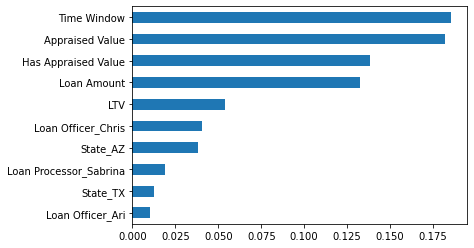

In [17]:
feat_importances = pd.Series(gbc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh').invert_yaxis()

In [18]:
print(classification_report(y_test, gbt.predict(X_test)))

NameError: name 'classification_report' is not defined

In [19]:
cm = confusion_matrix(y_test, gbt.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Withdrawns', 'Predicted Closeds'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Withdrawns', 'Actual Closeds'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

NameError: name 'confusion_matrix' is not defined

In [27]:
y_pred = gbt.predict(X_test)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9359522559242496

# XGBoost

In [76]:
!pip install xgboost

In [112]:
import xgboost as xgb

In [113]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [114]:
# grid search
nmc = 50
param_grid={'n_estimators':[100, 200, 300],'max_depth':[3,4,5],'learning_rate':[0.01, 0.1,0.2,0.3]}
cvf=ShuffleSplit(test_size=0.25,n_splits=nmc)
grid_search=GridSearchCV(XGBClassifier(),param_grid,cv=cvf,return_train_score=True)
grid_search.fit(X,y)
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_n_estimators','param_max_depth','param_learning_rate']])

    rank_test_score  mean_test_score param_n_estimators param_max_depth  \
0                36         0.722181                100               3   
1                35         0.736936                200               3   
2                33         0.746957                300               3   
3                34         0.744080                100               4   
4                32         0.768254                200               4   
5                30         0.781512                300               4   
6                31         0.772361                100               5   
7                29         0.797445                200               5   
8                27         0.813311                300               5   
9                28         0.799117                100               3   
10               26         0.828388                200               3   
11               23         0.857338                300               3   
12               25      

In [90]:
# grid search
model = XGBClassifier()
n_estimators = [100, 200, 300]
learning_rate = [0.01, 0.1,0.2,0.3]
max_depth = [3,4,5]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators,max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train,y_train)

exception calling callback for <Future at 0x7f48a8562ad0 state=finished raised BrokenProcessPool>
sklearn.externals.joblib.externals.loky.process_executor._RemoteTraceback: 
'''
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py", line 172, in __setstate__
    bst = state["_Booster"]
KeyError: '_Booster'
'''

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

# Export Model

In [31]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

In [32]:
cred1 = credentials.Certificate('gbt.json')
app = firebase_admin.initialize_app(cred1)
db = firestore.client()

print('initialized')

ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [33]:
import joblib
from firebase_admin import storage

In [34]:
joblib.dump(gbt, 'model.joblib') # dump model into joblib file
bucket = storage.bucket(name='elphi-da-staging') # save it to firebase storage bucket; name: save path - bucket path

b = bucket.blob('model.joblib')
b.upload_from_filename('model.joblib')
print('model uploaded!')

model uploaded!


In [78]:
pip install scikit_learn==0.20.4

Note: you may need to restart the kernel to use updated packages.


In [50]:
import sklearn
sklearn.__version__

'0.20.4'

In [ ]:
import * as functions from 'firebase-functions';

import { google } from 'googleapis';
const ml = google.ml('v1')

export const predictHappiness = functions.https.onRequest(async (request, response) => {
    
    const instances = request.body.instances; 
    const model = request.body.model; 

    const { credential } = await google.auth.getApplicationDefault();
    const modelName = `projects/YOUR-PROJECT/models/${model}`;

    const preds = await ml.projects.predict({
        auth: credential,
        name: modelName,
        requestBody: { 
            instances
        }
    } as any);

    response.send(JSON.stringify(preds.data))

});

In [ ]:
gcloud firestore export gs://